## Optimization Sparse Regression Approach In Chemometrics Using Machine Learning

In [43]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

### Explanatory Data Analysis

#### Al_spectre Dataset

In [2]:
# Load the Al_Spectre dataset from an Excel file into a Pandas DataFrame  
spectre = pd.read_excel('Data/Al_Spectre.xlsx')

# Display the first five rows of the dataset to inspect its structure and contents  
spectre.head()

,3004,3004.1,3004.2,3005,3005.1,3005.2,3105,3105.1,3105.2,5454,...,6061.2,6351,6351.1,6351.2,1063,1063.1,1063.2,413,413.1,413.2
0,179,179,86,88,132,133,126,156,82,104,...,160,137,127,134,60,14,0,97,88,167
1,182,184,92,92,140,137,133,159,88,108,...,167,141,133,138,64,19,6,102,94,171
2,184,186,97,96,142,142,136,160,90,115,...,170,148,138,139,68,25,8,105,98,176
3,191,189,101,100,146,147,139,164,96,121,...,177,152,146,142,71,34,15,111,101,185
4,199,194,104,105,153,152,143,169,106,121,...,187,158,153,149,76,39,23,114,106,192


In [3]:
# Generate summary statistics for numerical features in the Al_Spectre dataset  
spectre.describe()

,3004,3004.1,3004.2,3005,3005.1,3005.2,3105,3105.1,3105.2,5454,...,6061.2,6351,6351.1,6351.2,1063,1063.1,1063.2,413,413.1,413.2
count,2016.000000,2016.000000,2016.000000,2016.00000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,...,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,1013.510913,1013.576389,1015.056052,1015.00248,1014.364087,1014.191964,1014.441468,1013.893849,1015.090774,1014.674603,...,1013.761905,1014.179563,1014.330357,1014.095734,1015.543155,1016.156250,1016.469742,1014.804563,1014.867560,1013.687996
std,998.944034,998.814579,997.336297,996.80561,997.595471,997.237508,996.979304,997.837283,995.808407,998.337262,...,998.550289,998.318563,997.898182,997.285133,997.054832,996.128024,995.691960,997.553359,996.441854,998.259669
min,179.000000,179.000000,86.000000,88.00000,132.000000,133.000000,126.000000,156.000000,82.000000,104.000000,...,160.000000,137.000000,127.000000,134.000000,60.000000,14.000000,0.000000,97.000000,88.000000,167.000000
25%,662.000000,667.750000,663.000000,648.00000,648.000000,656.000000,668.000000,662.750000,684.000000,655.750000,...,672.000000,659.000000,664.000000,684.000000,682.000000,676.000000,681.000000,694.000000,712.000000,701.000000
50%,760.000000,763.000000,770.000000,763.50000,759.000000,764.000000,773.500000,765.000000,785.000000,756.000000,...,777.000000,766.000000,770.000000,779.000000,782.500000,782.500000,789.500000,792.000000,811.500000,792.000000
75%,911.000000,906.000000,929.000000,919.25000,907.000000,909.250000,911.250000,905.000000,920.250000,927.000000,...,896.000000,892.250000,903.000000,909.250000,928.000000,934.000000,937.000000,929.000000,938.250000,910.250000
max,9055.000000,9122.000000,8785.000000,8962.00000,8940.000000,9275.000000,9554.000000,9269.000000,10353.000000,8303.000000,...,8819.000000,8703.000000,9279.000000,9605.000000,10384.000000,9873.000000,10224.000000,10195.000000,11151.000000,10961.000000


In [5]:
# Check for missing values in each column of the Al_Spectre dataset  
spectre.isnull().sum()

3004      0
3004.1    0
3004.2    0
3005      0
3005.1    0
3005.2    0
3105      0
3105.1    0
3105.2    0
5454      0
5454.1    0
5454.2    0
6111      0
6111.1    0
6111.2    0
6061      0
6061.1    0
6061.2    0
6351      0
6351.1    0
6351.2    0
1063      0
1063.1    0
1063.2    0
413       0
413.1     0
413.2     0
dtype: int64

#### Chemical Dataset

In [7]:
# Load the chemical elements dataset from an Excel file into a Pandas DataFrame  
chemical_elements = pd.read_excel('Data/CRM ELEMISSION Maroc-1.xlsx')

# Display the first five rows to inspect the dataset structure and contents  
chemical_elements.head()

,Stdname,Certifié le,Inventaire,Débit / an,Tri,REMARQUE,Tiers,Prix,Type,Statut,...,Zr,Sb,P,K,SiC,Hg,As,Ba,Mo,Tl
0,HP FJ,01/15/2002,1080.0,300.0,0,NaN,N,295,D,NaN,...,0.0001,0.0001,0.0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A413.2 CAB,06/10/1994,33.0,17.0,1,NaN,N,200,D,NaN,...,0.0001,0.0014,0.0003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6061 DAO,10/17/2000,499.0,NaN,0,standard de contrôle de qualité,N,150,D,NaN,...,0.0023,NaN,0.0008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3005 CAB,05/06/1993,49.0,10.0,1,NaN,N,200,D,NaN,...,0.0001,0.0001,0.0002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3104 CAO,NaN,NaN,40.0,0,remplace 3104 CAJ,N,295,D,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Generate summary statistics for numerical features in the chemical elements dataset  
chemical_elements.describe()

,Inventaire,Débit / an,Tri,Prix,Statut,InvCheck,Number,Position,Initial,Cu,...,Zr,Sb,P,K,SiC,Hg,As,Ba,Mo,Tl
count,9.000000,9.000000,10.000000,10.000000,0.0,0.0,9.000000,0.0,10.000000,9.000000,...,9.000000,8.000000,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,274.000000,50.111111,0.700000,218.000000,NaN,NaN,15934.000000,NaN,307.000000,0.152356,...,0.001356,0.001500,0.001289,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,349.739546,94.661825,0.483046,45.837879,NaN,NaN,5248.490378,NaN,301.184698,0.246386,...,0.001536,0.001676,0.001727,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,3.000000,0.000000,150.000000,NaN,NaN,10346.000000,NaN,120.000000,0.000100,...,0.000100,0.000100,0.000100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,49.000000,10.000000,0.250000,200.000000,NaN,NaN,10388.000000,NaN,120.000000,0.000400,...,0.000100,0.000100,0.000100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,138.000000,17.000000,1.000000,200.000000,NaN,NaN,20145.000000,NaN,120.000000,0.057000,...,0.000100,0.000750,0.000300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,417.000000,38.000000,1.000000,230.000000,NaN,NaN,20175.000000,NaN,437.500000,0.170000,...,0.002600,0.002950,0.002000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1080.000000,300.000000,1.000000,295.000000,NaN,NaN,21066.000000,NaN,1000.000000,0.750000,...,0.003700,0.004200,0.005000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Display a concise summary of the chemical elements dataset, including data types and non-null counts  
chemical_elements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 49 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Stdname      10 non-null     object 
 1   Certifié le  9 non-null      object 
 2   Inventaire   9 non-null      float64
 3   Débit / an   9 non-null      float64
 4   Tri          10 non-null     int64  
 5   REMARQUE     5 non-null      object 
 6   Tiers        10 non-null     object 
 7   Prix         10 non-null     int64  
 8   Type         10 non-null     object 
 9   Statut       0 non-null      float64
 10  InvCheck     0 non-null      float64
 11  Number       9 non-null      float64
 12  Alloy        10 non-null     object 
 13  Series       10 non-null     object 
 14  Position     0 non-null      float64
 15  Remplace     8 non-null      object 
 16  Initial      10 non-null     int64  
 17  Cu           9 non-null      float64
 18  Fe           9 non-null      float64
 19  Mg         

In [9]:
# Generate descriptive statistics for numerical features in the chemical elements dataset  
chemical_elements.describe()

,Inventaire,Débit / an,Tri,Prix,Statut,InvCheck,Number,Position,Initial,Cu,...,Zr,Sb,P,K,SiC,Hg,As,Ba,Mo,Tl
count,9.000000,9.000000,10.000000,10.000000,0.0,0.0,9.000000,0.0,10.000000,9.000000,...,9.000000,8.000000,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,274.000000,50.111111,0.700000,218.000000,NaN,NaN,15934.000000,NaN,307.000000,0.152356,...,0.001356,0.001500,0.001289,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,349.739546,94.661825,0.483046,45.837879,NaN,NaN,5248.490378,NaN,301.184698,0.246386,...,0.001536,0.001676,0.001727,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,3.000000,0.000000,150.000000,NaN,NaN,10346.000000,NaN,120.000000,0.000100,...,0.000100,0.000100,0.000100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,49.000000,10.000000,0.250000,200.000000,NaN,NaN,10388.000000,NaN,120.000000,0.000400,...,0.000100,0.000100,0.000100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,138.000000,17.000000,1.000000,200.000000,NaN,NaN,20145.000000,NaN,120.000000,0.057000,...,0.000100,0.000750,0.000300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,417.000000,38.000000,1.000000,230.000000,NaN,NaN,20175.000000,NaN,437.500000,0.170000,...,0.002600,0.002950,0.002000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1080.000000,300.000000,1.000000,295.000000,NaN,NaN,21066.000000,NaN,1000.000000,0.750000,...,0.003700,0.004200,0.005000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Preprocessing
Handling missing values, outliers, and categorical variables.

In [12]:
# Convert column names to strings and store them as a list 
aluminum_types = spectre.columns.astype(str).tolist()

# Define a mapping of aluminum type codes to their corresponding categories  
type_mapping = {
    "3004": "3004 CAM", "3004.1": "3004 CAM", "3004.2": "3004 CAM",
    "3005": "3005 CAB", "3005.1": "3005 CAB", "3005.2": "3005 CAB",
    "3105": "3105 AD", "3105.1": "3105 AD", "3105.2": "3105 AD",
    "5454": "5454 CAB", "5454.1": "5454 CAB", "5454.2": "5454 CAB",
    "6111": "6111 AE", "6111.1": "6111 AE", "6111.2": "6111 AE",
    "6061": "6061 DAO", "6061.1": "6061 DAO", "6061.2": "6061 DAO",
    "6351": "6351 AJ", "6351.1": "6351 AJ", "6351.2": "6351 AJ",
    "1063": "HP FJ", "1063.1": "HP FJ", "1063.2": "HP FJ",
    "413": "A413.2 CAB", "413.1": "A413.2 CAB", "413.2": "A413.2 CAB"
}

# Create a DataFrame to store aluminum type information  
data_types = pd.DataFrame({"Aluminum_Type": aluminum_types})

# Map the aluminum type codes to their corresponding categories  
data_types["Type"] = data_types["Aluminum_Type"].map(type_mapping)

# --- Data Cleaning ---
# Normalize 'Stdname' column by removing leading and trailing spaces  
chemical_elements["Stdname"] = chemical_elements["Stdname"].str.strip()

# --- Merge Datasets ---
# Merge aluminum type data with chemical elements dataset based on the 'Type' column  
merged_df = pd.merge(data_types, chemical_elements, left_on="Type", right_on="Stdname", how="inner")

# --- Save Merged Dataset ---
# Export the merged dataset as a CSV file  
merged_df.to_csv("Data/Alumimun.csv", index=False)

# Confirm successful merging  
print("Merging completed. Output saved as 'Alumimun.csv.csv'.")

Merging completed. Output saved as 'Alumimun.csv.csv'.


In [13]:
# Load the merged aluminum dataset from the CSV file into a Pandas DataFrame  
Aluminum = pd.read_csv("Data/Alumimun.csv")

# Display the first five rows of the dataset to inspect its structure and contents  
Aluminum.head()

,Aluminum_Type,Type_x,Stdname,Certifié le,Inventaire,Débit / an,Tri,REMARQUE,Tiers,Prix,...,Zr,Sb,P,K,SiC,Hg,As,Ba,Mo,Tl
0,3004.0,3004 CAM,3004 CAM,02/01/1994,1.0,12.0,1,Ok,N,200,...,0.0001,0.0001,0.0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3004.1,3004 CAM,3004 CAM,02/01/1994,1.0,12.0,1,Ok,N,200,...,0.0001,0.0001,0.0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3004.2,3004 CAM,3004 CAM,02/01/1994,1.0,12.0,1,Ok,N,200,...,0.0001,0.0001,0.0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3005.0,3005 CAB,3005 CAB,05/06/1993,49.0,10.0,1,NaN,N,200,...,0.0001,0.0001,0.0002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3005.1,3005 CAB,3005 CAB,05/06/1993,49.0,10.0,1,NaN,N,200,...,0.0001,0.0001,0.0002,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Generate summary statistics for numerical features in the Aluminum dataset  
Aluminum.describe()

,Aluminum_Type,Inventaire,Débit / an,Tri,Prix,Statut,InvCheck,Number,Position,Initial,...,Zr,Sb,P,K,SiC,Hg,As,Ba,Mo,Tl
count,27.000000,27.000000,24.000000,27.000000,27.000000,0.0,0.0,24.000000,0.0,27.000000,...,27.000000,24.000000,27.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,3840.877778,274.000000,51.375000,0.777778,209.444444,NaN,NaN,15399.125000,NaN,274.444444,...,0.001356,0.001500,0.001289,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2158.867161,336.018887,96.620194,0.423659,37.706695,NaN,NaN,5104.660772,NaN,288.435212,...,0.001475,0.001601,0.001659,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,413.000000,1.000000,3.000000,0.000000,150.000000,NaN,NaN,10346.000000,NaN,120.000000,...,0.000100,0.000100,0.000100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3004.050000,49.000000,8.750000,1.000000,200.000000,NaN,NaN,10377.750000,NaN,120.000000,...,0.000100,0.000100,0.000100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3105.100000,138.000000,14.500000,1.000000,200.000000,NaN,NaN,15352.000000,NaN,120.000000,...,0.000100,0.000750,0.000300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,6061.150000,417.000000,29.000000,1.000000,200.000000,NaN,NaN,20169.000000,NaN,250.000000,...,0.002600,0.002950,0.002000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,6351.200000,1080.000000,300.000000,1.000000,295.000000,NaN,NaN,21066.000000,NaN,1000.000000,...,0.003700,0.004200,0.005000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Display a concise summary of the Aluminum dataset, including data types and non-null counts  
Aluminum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Aluminum_Type  27 non-null     float64
 1   Type_x         27 non-null     object 
 2   Stdname        27 non-null     object 
 3   Certifié le    27 non-null     object 
 4   Inventaire     27 non-null     float64
 5   Débit / an     24 non-null     float64
 6   Tri            27 non-null     int64  
 7   REMARQUE       12 non-null     object 
 8   Tiers          27 non-null     object 
 9   Prix           27 non-null     int64  
 10  Type_y         27 non-null     object 
 11  Statut         0 non-null      float64
 12  InvCheck       0 non-null      float64
 13  Number         24 non-null     float64
 14  Alloy          27 non-null     object 
 15  Series         27 non-null     object 
 16  Position       0 non-null      float64
 17  Remplace       21 non-null     object 
 18  Initial     

In [ ]:
# Drop the 'Type_x' and 'Stdname' columns from the Aluminum dataset as they are no longer needed  
Aluminum = Aluminum.drop(columns=["Type_x", "Stdname"], axis=1)

In [20]:
# Display an updated summary of the Aluminum dataset to verify that the 'Type_x' and 'Stdname' columns have been dropped  
Aluminum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Aluminum_Type  27 non-null     float64
 1   Certifié le    27 non-null     object 
 2   Inventaire     27 non-null     float64
 3   Débit / an     24 non-null     float64
 4   Tri            27 non-null     int64  
 5   REMARQUE       12 non-null     object 
 6   Tiers          27 non-null     object 
 7   Prix           27 non-null     int64  
 8   Type_y         27 non-null     object 
 9   Statut         0 non-null      float64
 10  InvCheck       0 non-null      float64
 11  Number         24 non-null     float64
 12  Alloy          27 non-null     object 
 13  Series         27 non-null     object 
 14  Position       0 non-null      float64
 15  Remplace       21 non-null     object 
 16  Initial        27 non-null     int64  
 17  Cu             27 non-null     float64
 18  Fe          

### Handling categorical data

In [22]:
# Identify and list the numerical features in the Aluminum dataset  
numerical_features = Aluminum.select_dtypes(include=['number']).columns.tolist()
print(f"Numerical data: ", numerical_features)

# Identify and list the categorical features in the Aluminum dataset  
categorical_features = Aluminum.select_dtypes(include=['object']).columns.tolist()
print(f"Ctegorical Data: ", categorical_features)

Numerical data:  ['Aluminum_Type', 'Inventaire', 'Débit / an', 'Tri', 'Prix', 'Statut', 'InvCheck', 'Number', 'Position', 'Initial', 'Cu', 'Fe', 'Mg', 'Mn', 'Ni', 'Si', 'Ti', 'Zn', 'Bi', 'Cr', 'Pb', 'Sn', 'B', 'Be', 'Ca', 'Cd', 'Co', 'Ga', 'Li', 'Na', 'Sr', 'V', 'Zr', 'Sb', 'P', 'K', 'SiC', 'Hg', 'As', 'Ba', 'Mo', 'Tl']
Ctegorical Data:  ['Certifié le', 'REMARQUE', 'Tiers', 'Type_y', 'Alloy', 'Series', 'Remplace']


In [23]:
# Drop unnecessary columns from the Aluminum dataset that are not relevant for analysis  
Aluminum = Aluminum.drop(columns=["Certifié le","REMARQUE","Tiers","Type_y", "Alloy","Series","Remplace"], axis=1)

In [25]:
# Check for missing values in each column of the Aluminum dataset and return the count of null entries  
Aluminum.isnull().sum()

Aluminum_Type     0
Inventaire        0
Débit / an        3
Tri               0
Prix              0
Statut           27
InvCheck         27
Number            3
Position         27
Initial           0
Cu                0
Fe                0
Mg                0
Mn                0
Ni                0
Si                0
Ti                0
Zn                0
Bi                3
Cr                0
Pb                0
Sn                0
B                 9
Be                3
Ca                0
Cd                6
Co                9
Ga                0
Li                3
Na                0
Sr                3
V                 0
Zr                0
Sb                3
P                 0
K                27
SiC              27
Hg               27
As               27
Ba               27
Mo               27
Tl               27
dtype: int64

In [24]:
# Display an updated summary of the Aluminum dataset to check the data types and verify if any missing values remain
Aluminum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Aluminum_Type  27 non-null     float64
 1   Inventaire     27 non-null     float64
 2   Débit / an     24 non-null     float64
 3   Tri            27 non-null     int64  
 4   Prix           27 non-null     int64  
 5   Statut         0 non-null      float64
 6   InvCheck       0 non-null      float64
 7   Number         24 non-null     float64
 8   Position       0 non-null      float64
 9   Initial        27 non-null     int64  
 10  Cu             27 non-null     float64
 11  Fe             27 non-null     float64
 12  Mg             27 non-null     float64
 13  Mn             27 non-null     float64
 14  Ni             27 non-null     float64
 15  Si             27 non-null     float64
 16  Ti             27 non-null     float64
 17  Zn             27 non-null     float64
 18  Bi          

In [26]:
# Handle missing values in the Aluminum dataset by filling numerical columns with the column mean  
Aluminum = Aluminum.apply(lambda col: col.fillna(col.mean()), axis=1)

In [27]:
# Check if any missing values remain in the Aluminum dataset after filling them with the column mean  
Aluminum.isnull().sum()

Aluminum_Type    0
Inventaire       0
Débit / an       0
Tri              0
Prix             0
Statut           0
InvCheck         0
Number           0
Position         0
Initial          0
Cu               0
Fe               0
Mg               0
Mn               0
Ni               0
Si               0
Ti               0
Zn               0
Bi               0
Cr               0
Pb               0
Sn               0
B                0
Be               0
Ca               0
Cd               0
Co               0
Ga               0
Li               0
Na               0
Sr               0
V                0
Zr               0
Sb               0
P                0
K                0
SiC              0
Hg               0
As               0
Ba               0
Mo               0
Tl               0
dtype: int64

In [28]:
# Check for duplicate rows in the Aluminum dataset and return the count of duplicate entries  
Aluminum.duplicated().sum()

0

### Features and Target

In [33]:
# Define the feature set (X) by dropping the target variable 'Mg' from the Aluminum dataset  
X = Aluminum.drop(columns=["Mg"])

# Define the target variable (y) as the 'Mg' column from the Aluminum dataset  
y = Aluminum["Mg"]

In [34]:
# Split the dataset into training and testing sets with 20% of the data used for testing  
X_train, X_test,y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shape of the training and testing sets to verify the split  
print(f'Training Data : {X_train.shape}')
print(f'Testing Data : {X_test.shape}')

Training Data : (21, 41)
Testing Data : (6, 41)


## Models Training

### Linear Regression

In [36]:
# Initialize a Linear Regression model and train it using the training data (X_train, y_train)  
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

LinearRegression()

In [37]:
# Use the trained Linear Regression model to make predictions on the test set (X_test)  
y_lr_prediction = linear_regression.predict(X_test)

### Evaluation

In [40]:
# --- Model Evaluation Metrics ---

# Calculate and print the R-squared value to evaluate the proportion of variance explained by the model  
r2_linearRegression = metrics.r2_score(y_test,y_lr_prediction)
print('R-squared:', r2_linearRegression)

# Calculate and print the Mean Squared Error (MSE) to assess the average squared difference between actual and predicted values  
mse_linearRgression = metrics.mean_squared_error(y_test, y_lr_prediction)
print('Mean Squared Error', mse_linearRgression)

# Calculate and print the Root Mean Squared Error (RMSE) to measure the standard deviation of prediction errors  
rmse_linearRegression = np.sqrt(mse_linearRgression)
print('Root Mean Squared Error', rmse_linearRegression)

R-squared: 1.0
Mean Squared Error 2.2264384903514322e-24
Root Mean Squared Error 1.4921254941697873e-12


### Predicted vs Actual values

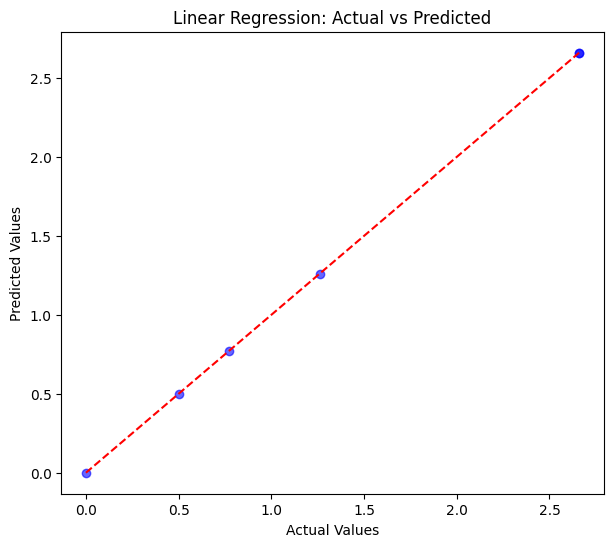

In [42]:
# Visualize the relationship between actual and predicted values for the Linear Regression model
# Plot a scatter plot of actual vs predicted values, with a red dashed line indicating perfect predictions
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_lr_prediction, color='blue', alpha=0.6)  # Scatter plot of actual vs predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line for perfect predictions
plt.title('Linear Regression: Actual vs Predicted')     # Title of the plot
plt.xlabel('Actual Values')     # Label for the x-axis
plt.ylabel('Predicted Values')  # Label for the y-axis
plt.show()    # Display the plot

### Observation:
The plot shows a near-perfect diagonal line, indicating that the model's predictions closely align with the actual values.

This suggests that the Linear Regression model has a good prediction performance with minimal bias.


## Random Forest

In [44]:
# Initialize the Random Forest Regressor model with a fixed random seed for reproducibility
random_forest = RandomForestRegressor(random_state=42)

# Train the Random Forest model on the training data (X_train, y_train)
random_forest.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

### Random Forest Model Evaluation

In [45]:
# Use the trained Random Forest model to make predictions on the test set (X_test)
y_RandomForest_prediction = random_forest.predict(X_test)

# --- Model Evaluation ---
# Calculate and print the R-squared value to evaluate the proportion of variance explained by the model
r2_RandomForest = metrics.r2_score(y_test, y_RandomForest_prediction)

# Calculate and print the Mean Squared Error (MSE) to assess the average squared difference between actual and predicted values
mse_RandomForest = metrics.mean_squared_error(y_test, y_RandomForest_prediction)

# Calculate and print the Mean Absolute Error (MAE) to evaluate the average magnitude of errors in predictions
mae_RandomForest = metrics.mean_absolute_error(y_test, y_RandomForest_prediction)

# Calculate and print the Root Mean Squared Error (RMSE) to measure the standard deviation of prediction errors
rmse_RandomForest = np.sqrt(mse_RandomForest)

# Display all evaluation metrics
print(f"R² Score: {r2_RandomForest:.4f}")
print(f"Mean Squared Error: {mse_RandomForest:.4f}")
print(f"Mean Absolute Error: {mae_RandomForest:.4f}")
print(f"Root Mean Squared Error: {rmse_RandomForest:.4f}")

R² Score: 0.8364
Mean Squared Error: 0.1721
Mean Absolute Error: 0.2692
Root Mean Squared Error: 0.4148


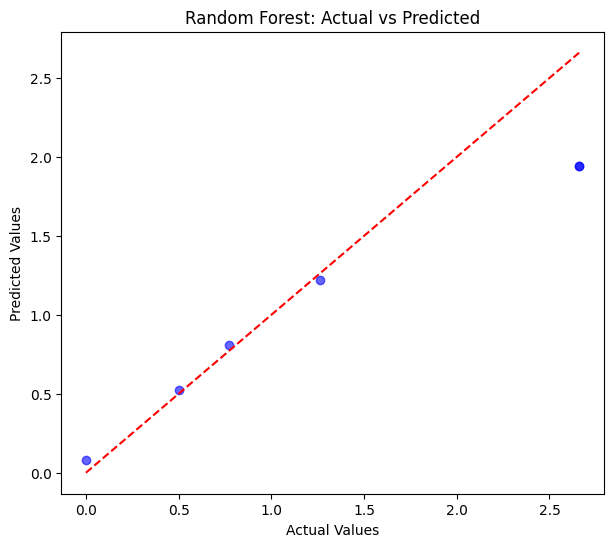

In [47]:
# Visualize the relationship between actual and predicted values for the Random Forest model
# Plot a scatter plot of actual vs predicted values, with a red dashed line indicating perfect predictions
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_RandomForest_prediction, color='blue', alpha=0.6) # Scatter plot of actual vs predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line for perfect predictions
plt.title('Random Forest: Actual vs Predicted') # Title of the plot
plt.xlabel('Actual Values') # Label for the y-axis
plt.ylabel('Predicted Values') # Label for the y-axis
plt.show()  # Display the plot